#Importing Packages

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [32]:
import kagglehub
path = kagglehub.dataset_download("laotse/credit-risk-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Kamo\.cache\kagglehub\datasets\laotse\credit-risk-dataset\versions\1


In [33]:
df=pd.read_csv(path+'/credit_risk_dataset.csv')

#Description of Variables

**person_age**: The age of the person.

**person_income**: The annual income of the person.

**person_home_ownership**: Information about the person's home ownership status.

**person_emp_length**: The length of time the person has been employed, measured in years.

**loan_intent**: The stated purpose or reason for the loan.

**loan_grade**: The assigned grade of the loan, likely reflecting a risk assessment.

**loan_amnt**: The amount of the loan.

**loan_int_rate**: The interest rate for the loan.

**loan_status**: The status of the loan, indicating whether it is non-default (0) or default (1). This is the target variable for predicting credit risk.

**loan_percent_income**: The loan amount as a percentage of the person's annual income.

**cb_person_default_on_file**: Indicates whether the person has a historical record of defaulting on credit.

**cb_preson_cred_hist_length**: The length of the person's credit history.

In [34]:
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
23435,32,35004,RENT,3.0,MEDICAL,D,8150,16.49,0,0.23,Y,5
20027,33,20000,RENT,5.0,EDUCATION,A,3625,6.99,0,0.18,N,9
119,25,12996,OWN,1.0,MEDICAL,D,3600,14.59,1,0.28,N,3
6633,23,52000,RENT,4.0,DEBTCONSOLIDATION,C,6000,14.22,0,0.12,N,4
19420,27,38000,RENT,5.0,MEDICAL,A,3000,7.49,0,0.08,N,8
19859,28,45000,RENT,6.0,MEDICAL,B,11000,11.99,0,0.24,N,7
6784,26,50000,MORTGAGE,0.0,EDUCATION,A,10000,7.74,0,0.20,N,2
20067,27,32000,MORTGAGE,3.0,HOMEIMPROVEMENT,B,4500,9.99,1,0.14,N,8
14047,24,100000,MORTGAGE,3.0,EDUCATION,A,10000,5.99,0,0.10,N,2
23097,28,60000,MORTGAGE,4.0,HOMEIMPROVEMENT,B,4800,NaN,0,0.08,N,9


#Handling missing values

In [35]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [36]:
df[df['person_emp_length'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [37]:
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)

In [38]:
df[df['loan_int_rate'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [39]:
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(lambda x: x.fillna(x.median()))


In [40]:
df = df[df["person_age"] <= 95]

In [41]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32576.000000,3.257600e+04,32576.000000,32576.000000,32576.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.767835,9589.117755,11.013769,0.218197,0.170212,5.803966
std,6.204990,5.253499e+04,4.087437,6321.886846,3.212445,0.413029,0.106778,4.053791
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.880000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.480000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#Exploratory Data Analysis using graphs and charts

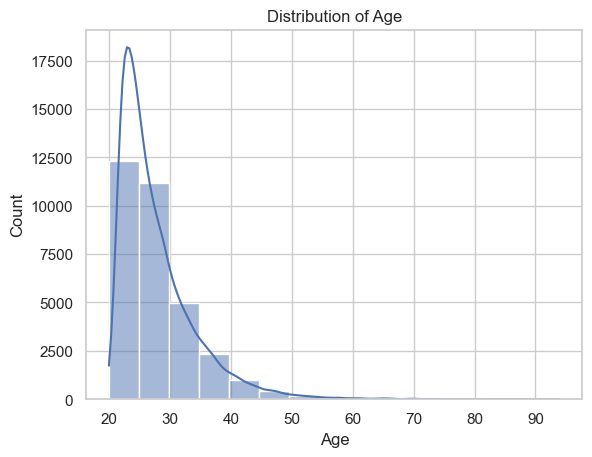

In [42]:
# Histogram of age
sns.histplot(df['person_age'], kde=True, bins=15)
plt.xlabel('Age')
plt.title('Distribution of Age')
plt.show()

Most of the people who took loans are in their 20s however people in their 30s also took loans there was a smaller number of people 70 and above

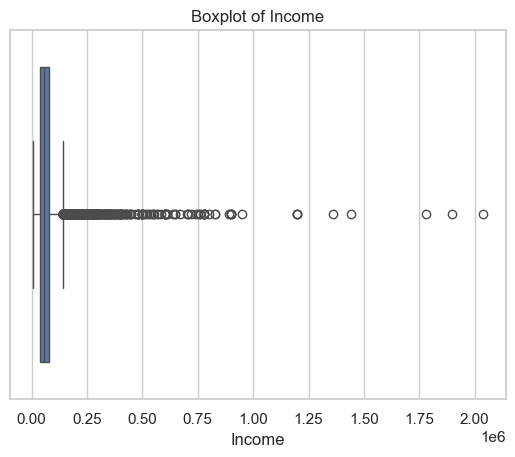

In [43]:
sns.boxplot(x=df['person_income'], orient='h',)
plt.xlabel('Income')
plt.title('Boxplot of Income')
plt.show()

The income of most of the people was in the range of 10,000 to 100,000 there is only one person who earns 6 million

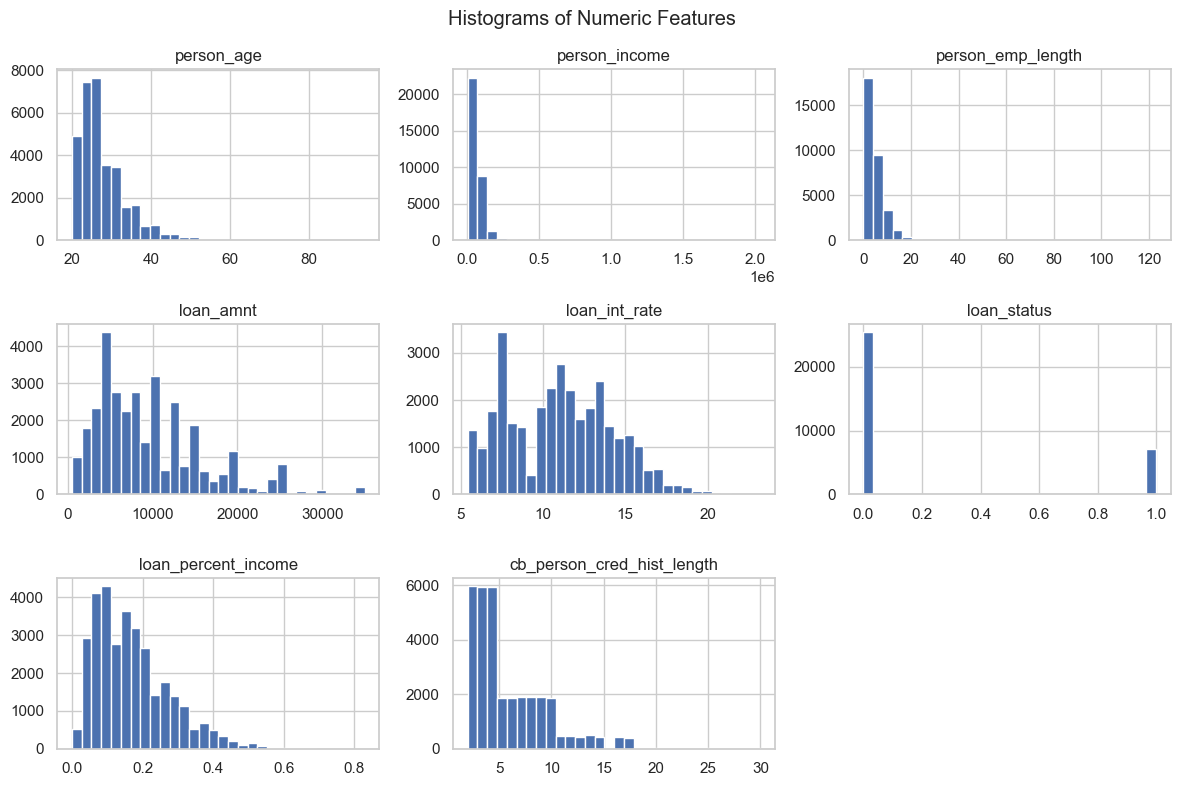

In [44]:
df.hist(bins=30, figsize=(12, 8))
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

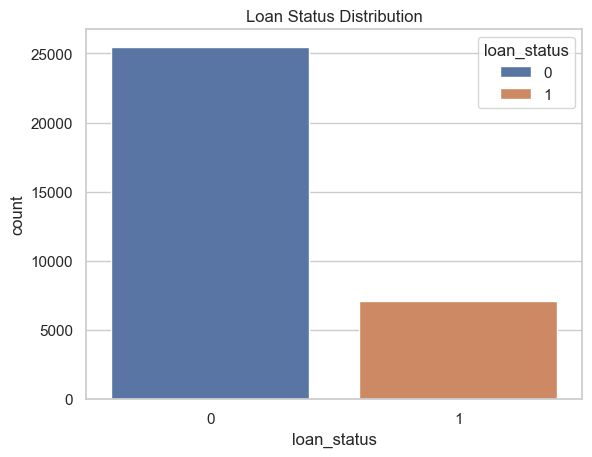

In [45]:
# Loan status count plot
sns.countplot(x='loan_status',hue="loan_status", data=df)
plt.title('Loan Status Distribution')
plt.show()

The Chart shows the Number of people who defaulted on their loans.We see that the people the defaulted on loans are less than those that did not

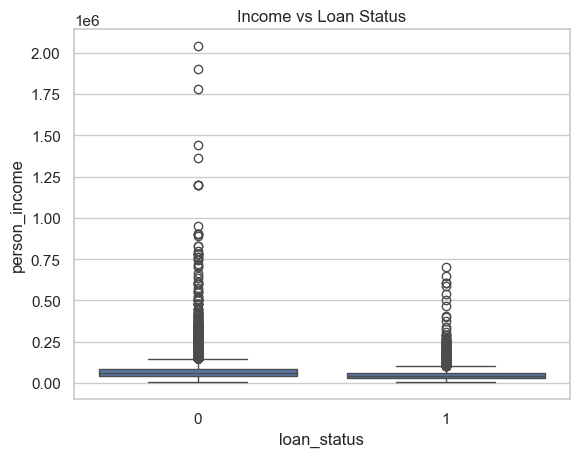

In [46]:
# Income vs loan status
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title('Income vs Loan Status')

plt.show()

Most people who defaulted on loans had incomes less than 100,000

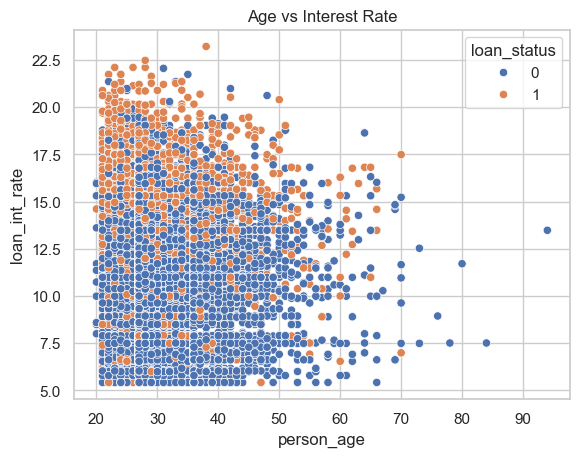

In [47]:
# Age vs loan interest rate
sns.scatterplot(x='person_age', y='loan_int_rate', hue='loan_status', data=df)
plt.title('Age vs Interest Rate')
plt.show()

People who defaulted on loans had higher interest rates on their loans

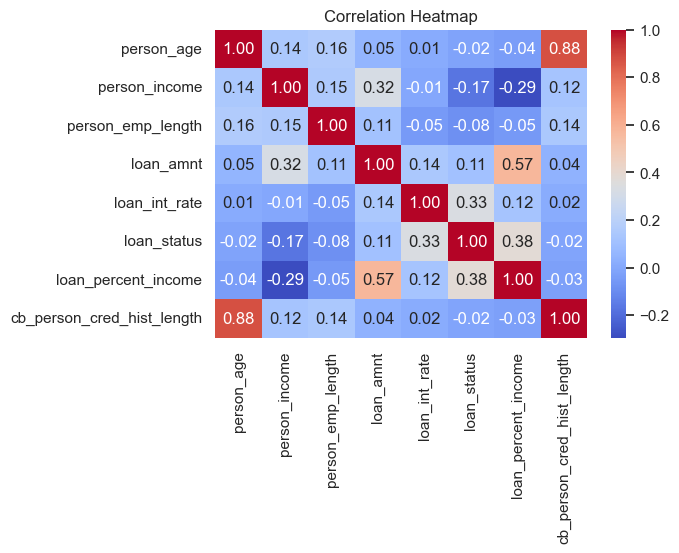

In [48]:
# Only numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#Encoding Categorical Variables

In [49]:
df.select_dtypes(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


In [50]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [51]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [52]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [53]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder

Encoding categorical variables

In [55]:
home_enc=LabelEncoder()
grade_enc=LabelEncoder()
intent_enc=LabelEncoder()
prevdefault_enc=LabelEncoder()

In [56]:
df['person_home_ownership']=home_enc.fit_transform(df['person_home_ownership'])
df['loan_grade']=grade_enc.fit_transform(df['loan_grade'])
df['loan_intent']=intent_enc.fit_transform(df['loan_intent'])
df['cb_person_default_on_file']=prevdefault_enc.fit_transform(df['cb_person_default_on_file'])

In [57]:
print("Home Ownership Encoding:")
for i, label in enumerate(home_enc.classes_):
    print(f"{label}: {i}")

print("\nLoan Grade Encoding:")
for i, label in enumerate(grade_enc.classes_):
    print(f"{label}: {i}")

print("\nLoan Purpose Encoding:")
for i, label in enumerate(intent_enc.classes_):
    print(f"{label}: {i}")

print("\nPrevious Default Encoding:")
for i, label in enumerate(prevdefault_enc.classes_):
    print(f"{label}: {i}")


Home Ownership Encoding:
MORTGAGE: 0
OTHER: 1
OWN: 2
RENT: 3

Loan Grade Encoding:
A: 0
B: 1
C: 2
D: 3
E: 4
F: 5
G: 6

Loan Purpose Encoding:
DEBTCONSOLIDATION: 0
EDUCATION: 1
HOMEIMPROVEMENT: 2
MEDICAL: 3
PERSONAL: 4
VENTURE: 5

Previous Default Encoding:
N: 0
Y: 1


In [58]:
#Dropping rows where employment length is greater than age
df[df['person_emp_length'] > df["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
210,21,192000,0,123.0,5,0,20000,6.54,0,0.10,0,4


In [59]:
indices_to_drop = df[df['person_emp_length'] > df["person_age"]].index
df = df.drop(indices_to_drop)

In [60]:
df['has_short_credit_history'] = (df['cb_person_cred_hist_length'] < 2).astype(int)

**Renaming Columns for Readability**

In [61]:
df.rename(columns={
    'person_age': 'age',
    'person_income': 'income',
    'person_home_ownership': 'home_ownership',
    'person_emp_length': 'employment_years',
    'loan_intent': 'loan_purpose',
    'loan_amnt': 'loan_amount',
    'loan_int_rate': 'interest_rate',
    'loan_status': 'default_status',
    'loan_percent_income': 'loan_to_income',
    'cb_person_default_on_file': 'has_previous_default',
    'cb_person_cred_hist_length': 'credit_history_years',
    'has_short_credit_history': 'short_credit_history'
}, inplace=True)


In [62]:
df.to_csv("../data/data1.csv", index=False)
